In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

data = pd.read_csv('HousingData.csv', na_values='NA')
print("Original data shape:", data.shape)
print("\nMissing values\n", data.isnull().sum())

Original data shape: (506, 14)

Missing values
 CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


**The 'na_values' parameter ensures that 'NA' strings are treated as missing values.**

In [ ]:
target_col = 'MEDV'
numerical_cols = data.columns.drop(target_col).tolist()
categorical_cols = []

Define numerical and categorical columns for processing
Exclude the target variable 'MEDV' from the feature engineering steps

In [ ]:
# Impute missing numerical values with the median
imputer_numerical = SimpleImputer(strategy='median')
data[numerical_cols] = imputer_numerical.fit_transform(data[numerical_cols])

# Check for missing values again after imputation
print("\nMissing values after imputation:\n", data.isnull().sum())


Missing values after imputation:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [ ]:
def iqr_winsorization(df, column):
    """
    Cuts off outliers using the Interquartile Range (IQR) method and replaces
    them with the upper and lower bounds.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[column] = np.where(df[column] > upper_bound, upper_bound,
                          np.where(df[column] < lower_bound, lower_bound, df[column]))
    return df

# Apply winsorization to all numerical features
for col in numerical_cols:
    data = iqr_winsorization(data, col)

print("\nData after outlier winsorization:")
print(data.describe())



Data after outlier winsorization:
             CRIM     ZN       INDUS   CHAS         NOX          RM  \
count  506.000000  506.0  506.000000  506.0  506.000000  506.000000   
mean     1.810211    0.0   11.028893    0.0    0.554695    6.275312   
std      2.623892    0.0    6.704679    0.0    0.115878    0.630242   
min      0.006320    0.0    0.460000    0.0    0.385000    4.778500   
25%      0.083235    0.0    5.190000    0.0    0.449000    5.885500   
50%      0.253715    0.0    9.690000    0.0    0.538000    6.208500   
75%      2.808720    0.0   18.100000    0.0    0.624000    6.623500   
max      6.896948    0.0   27.740000    0.0    0.871000    7.730500   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.845850    3.783947    9.549407  408.237154   18.463834  381.918836   
std     27.486962    2.069765    8.707259  168.537116    2.143924   19.054913   
m

In [ ]:
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print("\nFinal preprocessed data (scaled numerical features):\n", data.head())
print("\nDescriptive statistics of scaled data:\n", data.describe())


Final preprocessed data (scaled numerical features):
        CRIM   ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0 -0.688167  0.0 -1.301706   0.0 -0.144217  0.475982 -0.132771  0.148015   
1 -0.680160  0.0 -0.591052   0.0 -0.740262  0.231390  0.366141  0.572202   
2 -0.680167  0.0 -0.591052   0.0 -0.740262  1.444822 -0.282080  0.572202   
3 -0.678229  0.0 -1.321115   0.0 -0.835284  1.147817 -0.839258  1.101820   
4 -0.664236  0.0 -1.321115   0.0 -0.835284  1.384468 -0.533356  1.101820   

        RAD       TAX   PTRATIO         B     LSTAT  MEDV  
0 -0.982843 -0.666608 -1.477181  0.786988 -1.116310  24.0  
1 -0.867883 -0.987329 -0.309941  0.786988 -0.507148  21.6  
2 -0.867883 -0.987329 -0.309941  0.573183 -1.255422  34.7  
3 -0.752922 -1.106115  0.110265  0.667741 -1.415034  33.4  
4 -0.752922 -1.106115  0.110265  0.786988 -0.171816  36.2  

Descriptive statistics of scaled data:
                CRIM     ZN         INDUS   CHAS           NOX            RM  \
count  5

In [ ]:
data.to_csv('cleaned_housing_data.csv', index=False)
print("\nPreprocessed data saved to 'cleaned_housing_data.csv'")


Preprocessed data saved to 'cleaned_housing_data.csv'


In [ ]:
variance = data.var()
print(variance)

CRIM        1.001980
ZN          0.000000
INDUS       1.001980
CHAS        0.000000
NOX         1.001980
RM          1.001980
AGE         1.001980
DIS         1.001980
RAD         1.001980
TAX         1.001980
PTRATIO     1.001980
B           1.001980
LSTAT       1.001980
MEDV       84.586724
dtype: float64


In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
fig_size = (15, 10)


Generating Histograms...


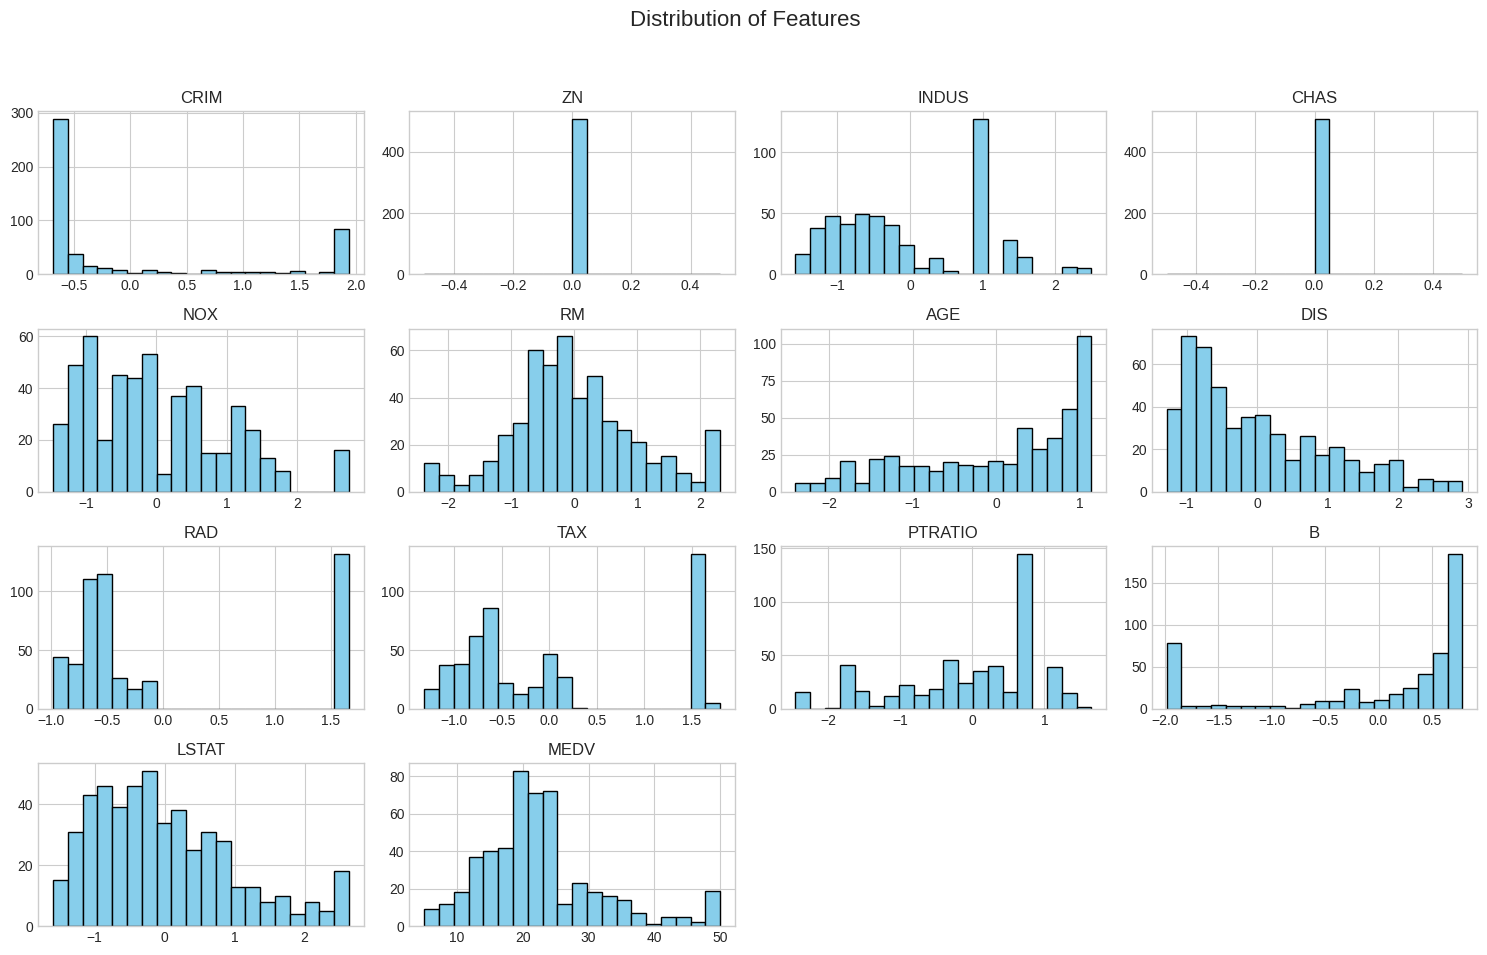


Generating Box Plots...


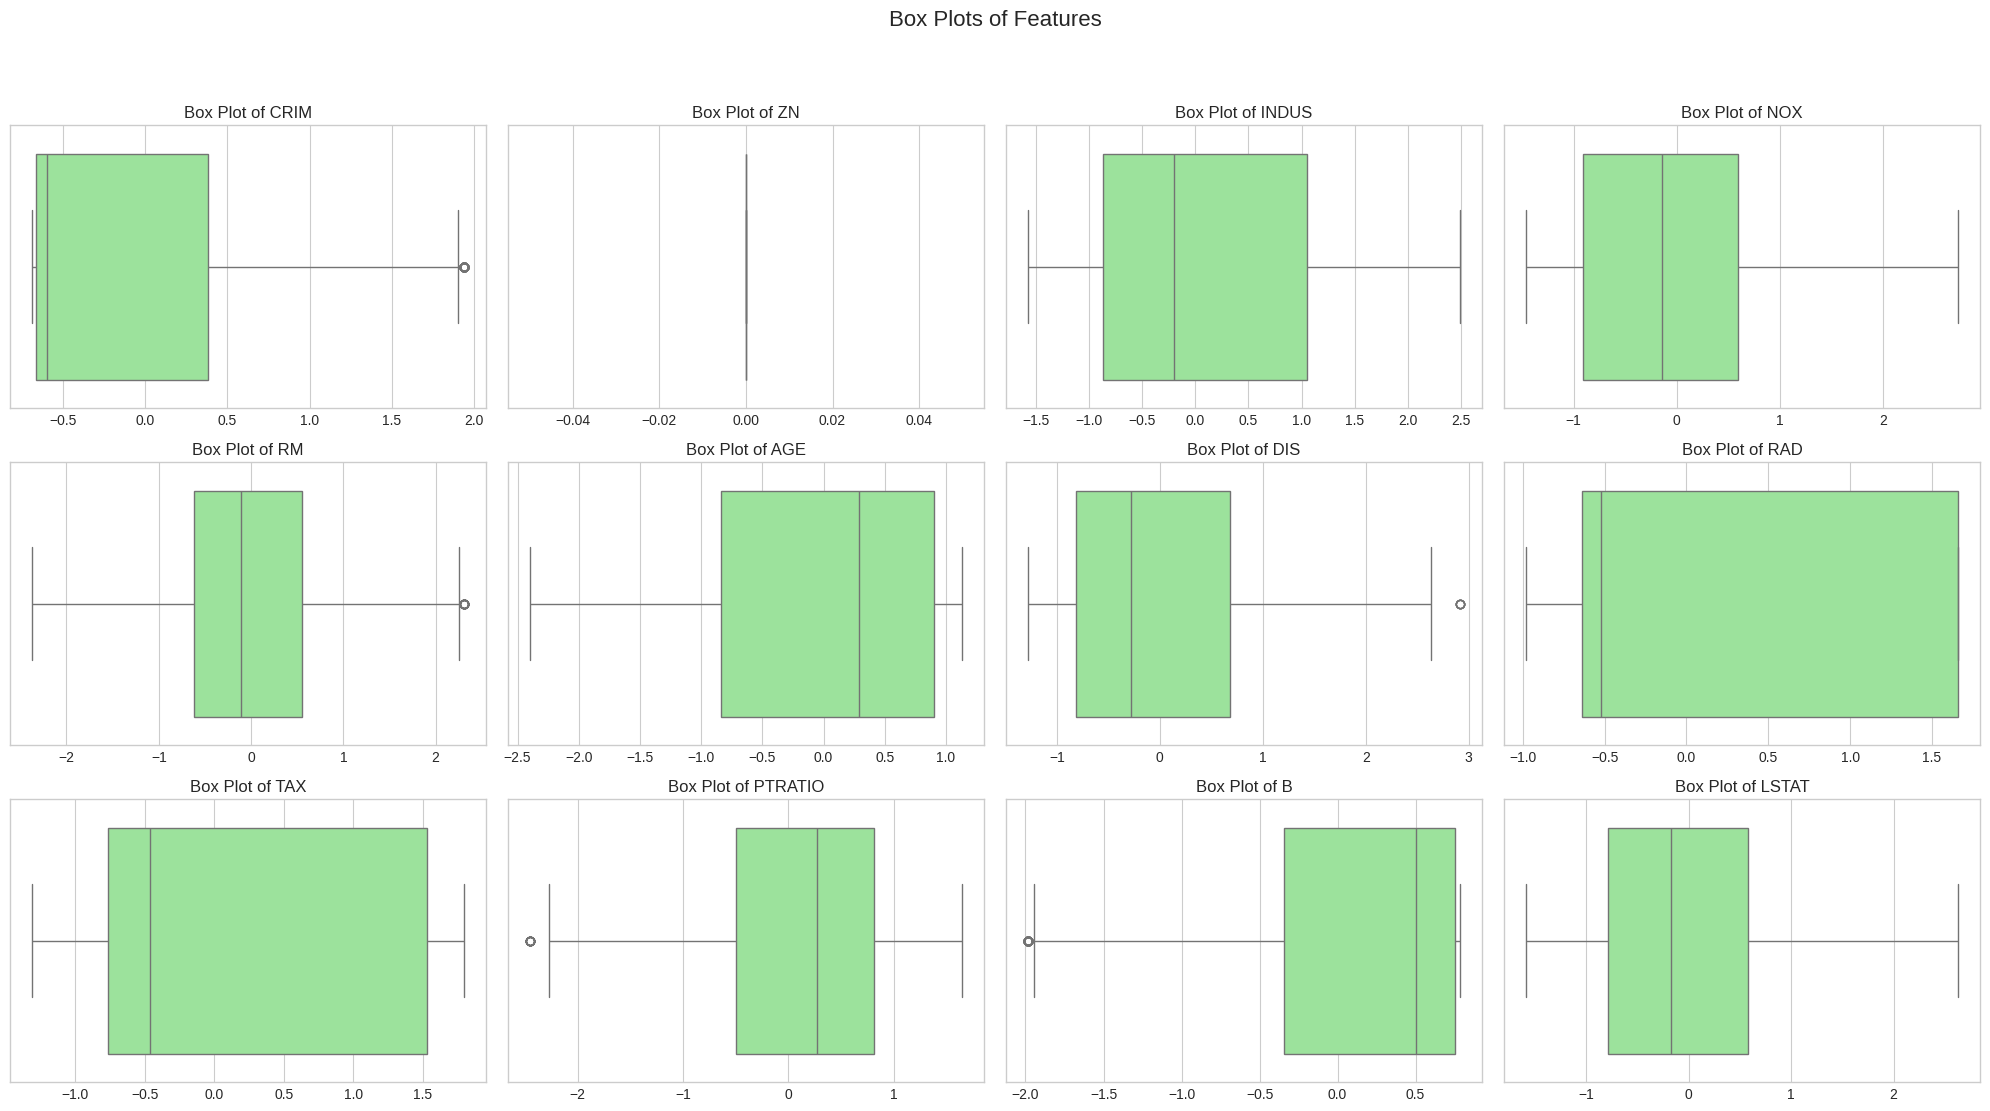


Generating Scatter Plots...


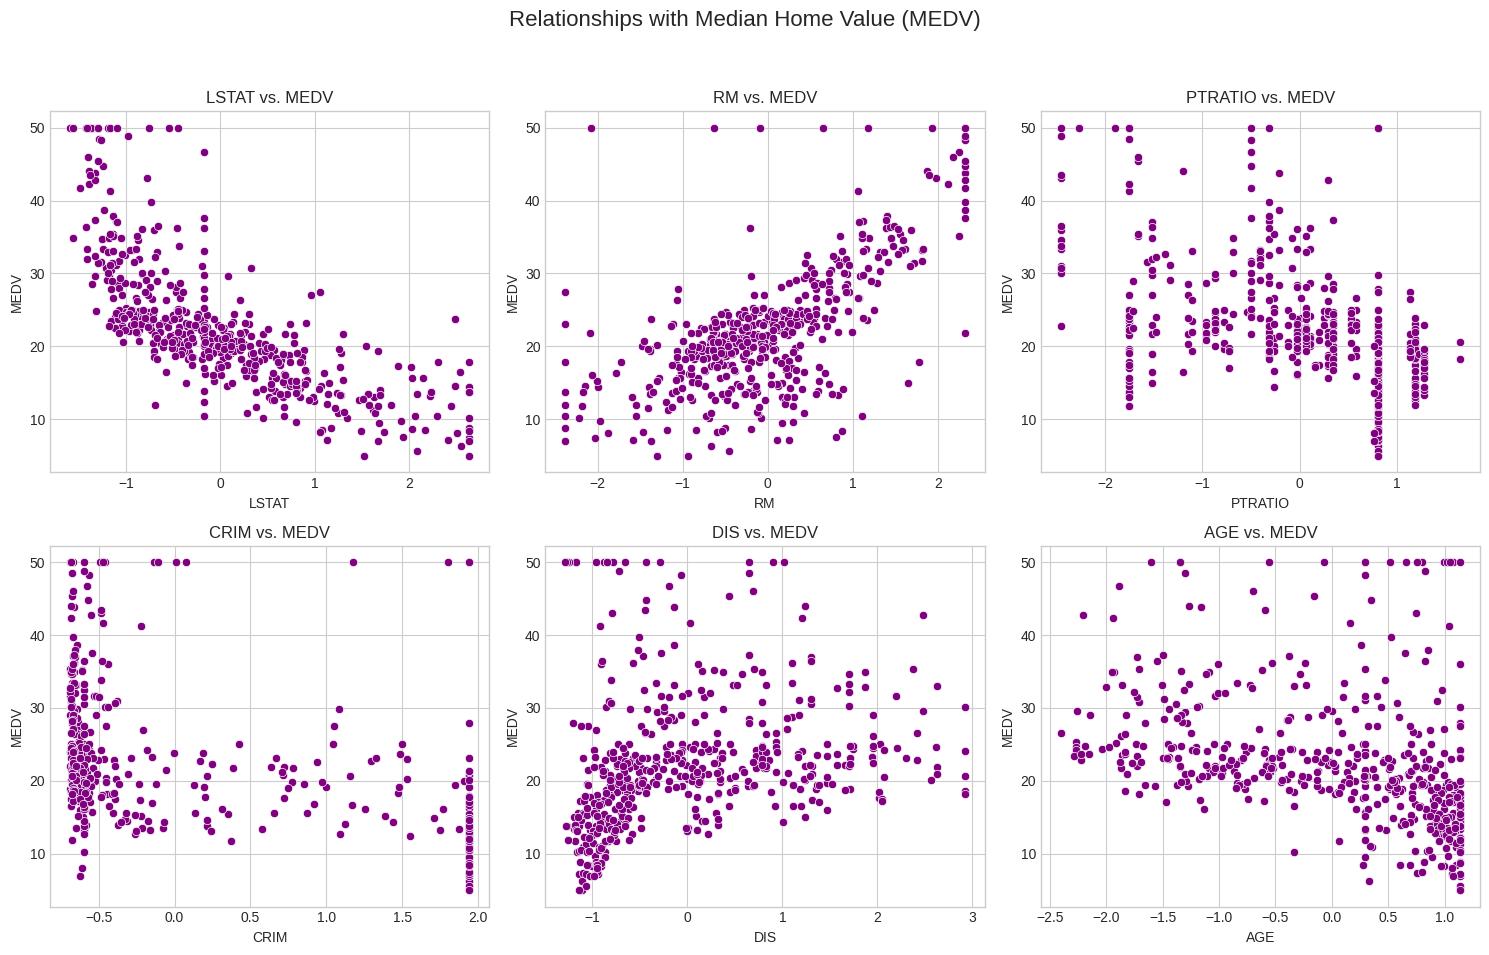


Generating Correlation Heatmap...


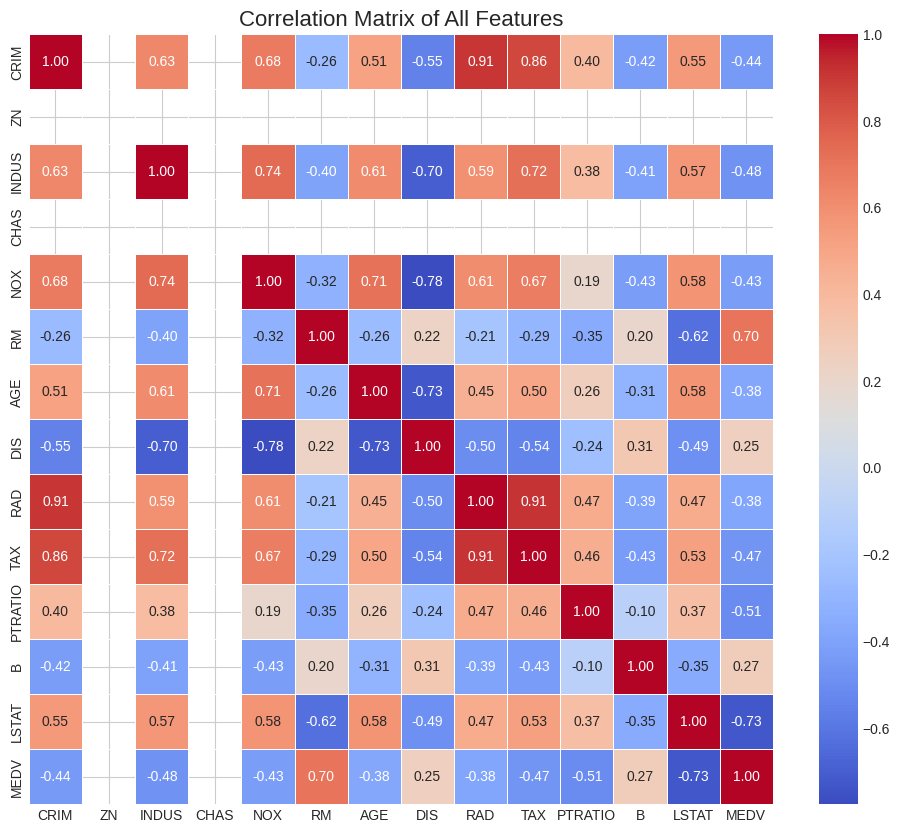

In [ ]:
print("\nGenerating Histograms...")
data.hist(bins=20, figsize=fig_size, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# b. Box plots for all numerical features
print("\nGenerating Box Plots...")
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(20, 15))
axes = axes.flatten()
cols_to_plot = data.columns.tolist()
if 'CHAS' in cols_to_plot:
    cols_to_plot.remove('CHAS') # Box plot for a binary variable isn't very informative.
if 'MEDV' in cols_to_plot:
    cols_to_plot.remove('MEDV')

for i, col in enumerate(cols_to_plot):
    sns.boxplot(x=data[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel('')

# Hide any empty subplots
for j in range(len(cols_to_plot), len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Box Plots of Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# c. Scatter plots for key features vs. MEDV
print("\nGenerating Scatter Plots...")
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=fig_size)
axes = axes.flatten()
important_features = ['LSTAT', 'RM', 'PTRATIO', 'CRIM', 'DIS', 'AGE']
for i, col in enumerate(important_features):
    sns.scatterplot(x=data[col], y=data['MEDV'], ax=axes[i], color='purple')
    axes[i].set_title(f'{col} vs. MEDV')
plt.suptitle('Relationships with Median Home Value (MEDV)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# d. Correlation Heatmap
print("\nGenerating Correlation Heatmap...")
plt.figure(figsize=(12, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of All Features', fontsize=16)
plt.show()
